In [1]:
%load_ext autoreload
%autoreload 2
import glob
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
import hist

import sys
sys.path.append("..")
from dnn.ak_sample_loader import *
from dnn.torch_dataset import *
from dnn.training import *
from dnn.validation import *
from dnn.fit import fitCruijff, CruijffFitResult

In [2]:
input_test_perEnergy = {
    10 : '/grid_mnt/data_cms_upgrade/cuisset/ticlRegression/PionSamples_v2/FixedEnergy_10.pkl',
 200 : '/grid_mnt/data_cms_upgrade/cuisset/ticlRegression/PionSamples_v2/FixedEnergy_200.pkl',
 300 : '/grid_mnt/data_cms_upgrade/cuisset/ticlRegression/PionSamples_v2/FixedEnergy_300.pkl',
 400: '/grid_mnt/data_cms_upgrade/cuisset/ticlRegression/PionSamples_v2/FixedEnergy_400.pkl',
 600 : '/grid_mnt/data_cms_upgrade/cuisset/ticlRegression/PionSamples_v2/FixedEnergy_600.pkl'}
input_samples = {energy : AkSampleLoader.loadFromPickle(inputFile) for energy, inputFile in input_test_perEnergy.items()}

In [3]:
from dnn.model import *
hists = {energy : inferenceOnSavedModel("/grid_mnt/data_cms_upgrade/cuisset/ticlRegression/models/v6/largeDNN/model.pt", LargeDNN(len(features["feat-v2"])), input, feature_version="feat-v2", fixedEnergySample=True) for energy, input in input_samples.items()}

In [4]:
fit_results_pred = {energy: fitCruijff(hists_en["h_pred_tot_over_cp"]) for energy, hists_en in hists.items()}
fit_results_reco = {energy: fitCruijff(hists_en["h_reco_tot_over_cp"]) for energy, hists_en in hists.items()}

/grid_mnt/vol_home/llr/cms/cuisset/hgcal/ticlRegression/dnn/../dnn/fit.py:45: RuntimeWarning: overflow encountered in exp
  return A* np.exp(-dx*dx/f)


In [5]:
from dnn.validation import *

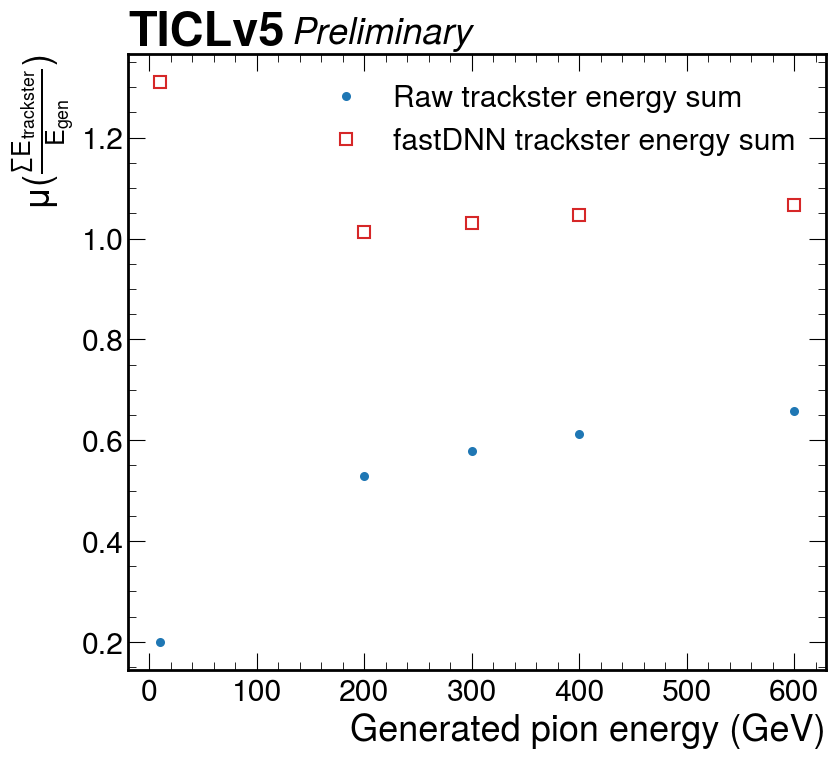

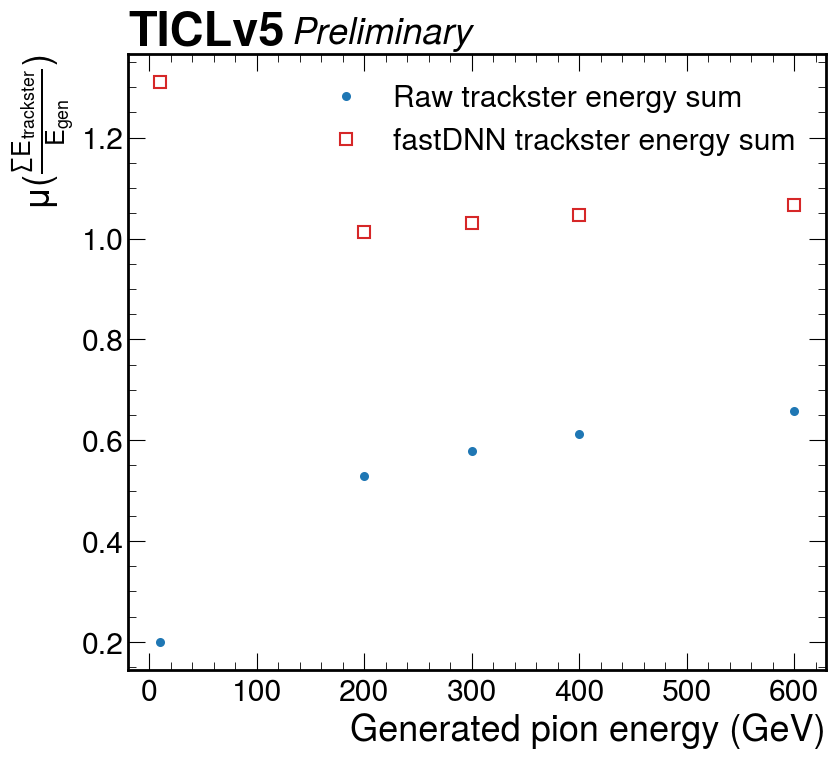

In [7]:
plotResolution({ "reco":fit_results_reco, "pred" : fit_results_pred}, legendLabel=dict(reco="Raw trackster energy sum", pred="fastDNN trackster energy sum"), plotMode="mu")